In [1]:
from TPED.projects.profile_tools.src.modify_profiles import PlasmaProfileModifier as PPM

from TPED.projects.profile_tools.utils.read_GENE_prof import GENEProfileReader
from TPED.projects.profile_tools.utils.read_pfile import PFileReader

from TPED.projects.utils.git_helpers import get_git_root
import os


In [2]:
git_path = get_git_root()

In [30]:
profile_dir = os.path.join(git_path, 'data/profiles/NSTX129015')
profile_xarray = GENEProfileReader(profile_dir).output_profile_xarray()

# pfile = os.path.join(git_path, 'data/profiles/NSTX129015/p129015.00400_x8099')
pfile = os.path.join('/global/homes/j/joeschm/data/ST_research/NSTXU_discharges/129015/p129015.00400_x8099')
pfile = os.path.join('/global/homes/j/joeschm/data/ST_research/NSTXU_discharges/132543/p132543.00700')
pfile_xarray = PFileReader(pfile).output_profile_xarray()

In [28]:
pfile_xarray

<xarray.Dataset> Size: 428kB
Dimensions:                  (psinorm: 1245)
Coordinates:
  * psinorm                  (psinorm) float64 10kB 0.0 0.001001 ... 0.999 1.0
Data variables: (12/42)
    ne                       (psinorm) float64 10kB 1.038 1.032 ... 0.2725
    ne_gradient              (psinorm) float64 10kB -8.524 -4.151 ... -5.049
    Te                       (psinorm) float64 10kB 0.9929 nan ... 0.04224
    Te_gradient              (psinorm) float64 10kB -0.6965 nan ... -1.76 -1.704
    ni                       (psinorm) float64 10kB 0.6922 0.6878 ... 0.2202
    ni_gradient              (psinorm) float64 10kB -6.155 -2.923 ... -3.269
    ...                       ...
    nz1(10^20/m^3)           (psinorm) float64 10kB 0.05347 nan ... 0.008707
    nz1(10^20/m^3)_gradient  (psinorm) float64 10kB -1.345 nan ... -1.835 -1.781
    vtor1(km/s)              (psinorm) float64 10kB 140.0 nan nan ... nan 11.94
    vtor1(km/s)_gradient     (psinorm) float64 10kB -0.264 nan nan ... nan 35.7
    vpol1(NO DATA)           (psinorm) float64 10kB 0.0 nan nan ... nan nan 0.0
    vpol1(NO DATA)_gradient  (psinorm) float64 10kB 0.0 nan nan ... nan nan 0.0

In [27]:

import matplotlib.pyplot as plt
import numpy as np


mod_pfile_xarray = PPM(pfile_xarray).eta_mode(scaling_loc=0.6, alpha=2)
# First, compute the square root of 'rho_pol' and store it in a new coordinate
# pfile_xarray = pfile_xarray.assign_coords(sqrt_rho_tor=np.sqrt(pfile_xarray['psinorm']))

var_name = 'Te'

# Now, use this new coordinate for plotting
pfile_xarray[var_name].plot(x='psinorm')
mod_pfile_xarray[var_name].plot(x='psinorm')
plt.show()


KeyError: "No variable named 'rho_tor'. Variables on the dataset include ['psinorm', 'ne', 'ne_gradient', 'Te', 'Te_gradient', ..., 'nz1(10^20/m^3)_gradient', 'vtor1(km/s)', 'vtor1(km/s)_gradient', 'vpol1(NO DATA)', 'vpol1(NO DATA)_gradient']"

In [15]:
import matplotlib.pyplot as plt
import numpy as np


mod_profile_xarray = PPM(profile_xarray).eta_mode(scaling_loc=0.6, alpha=2)
# mod_profile_xarray

In [16]:
# profile_xarray

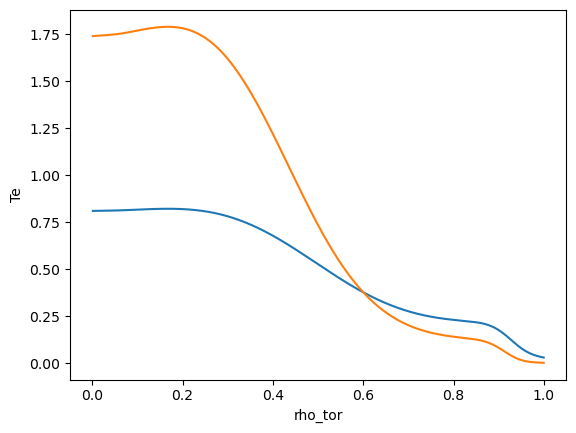

In [22]:

# First, compute the square root of 'rho_pol' and store it in a new coordinate
profile_xarray = profile_xarray.assign_coords(sqrt_rho_tor=np.sqrt(profile_xarray['rho_tor']))

var_name = 'Te'

# Now, use this new coordinate for plotting
profile_xarray[var_name].plot(x='rho_tor')
mod_profile_xarray[var_name].plot(x='rho_tor')
plt.show()


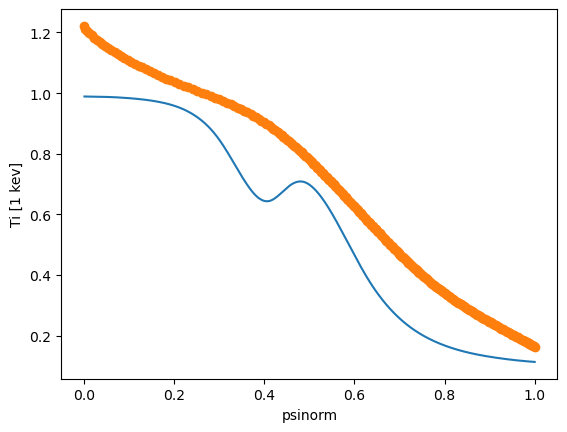

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# First, compute the square root of 'rho_pol' and store it in a new coordinate
profile_xarray = profile_xarray.assign_coords(sqrt_rho_tor=np.sqrt(profile_xarray['rho_tor']))

var_name = 'Ti'

# Now, use this new coordinate for plotting
# profile_xarray[var_name].plot(x='sqrt_rho_tor')
profile_xarray[var_name].plot(x='rho_tor')
# plt.show()
pfile_xarray[var_name].plot.line(marker='o')
plt.show()